In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
import warnings
warnings.filterwarnings('ignore')                           


In [2]:
import pandas as pd
from flask import Flask, render_template
from io import BytesIO
import base64

app = Flask(__name__)


In [3]:
df = pd.read_csv("auto-mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
df.shape

(398, 9)

In [7]:
df.describe()                                    #mean median

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [11]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

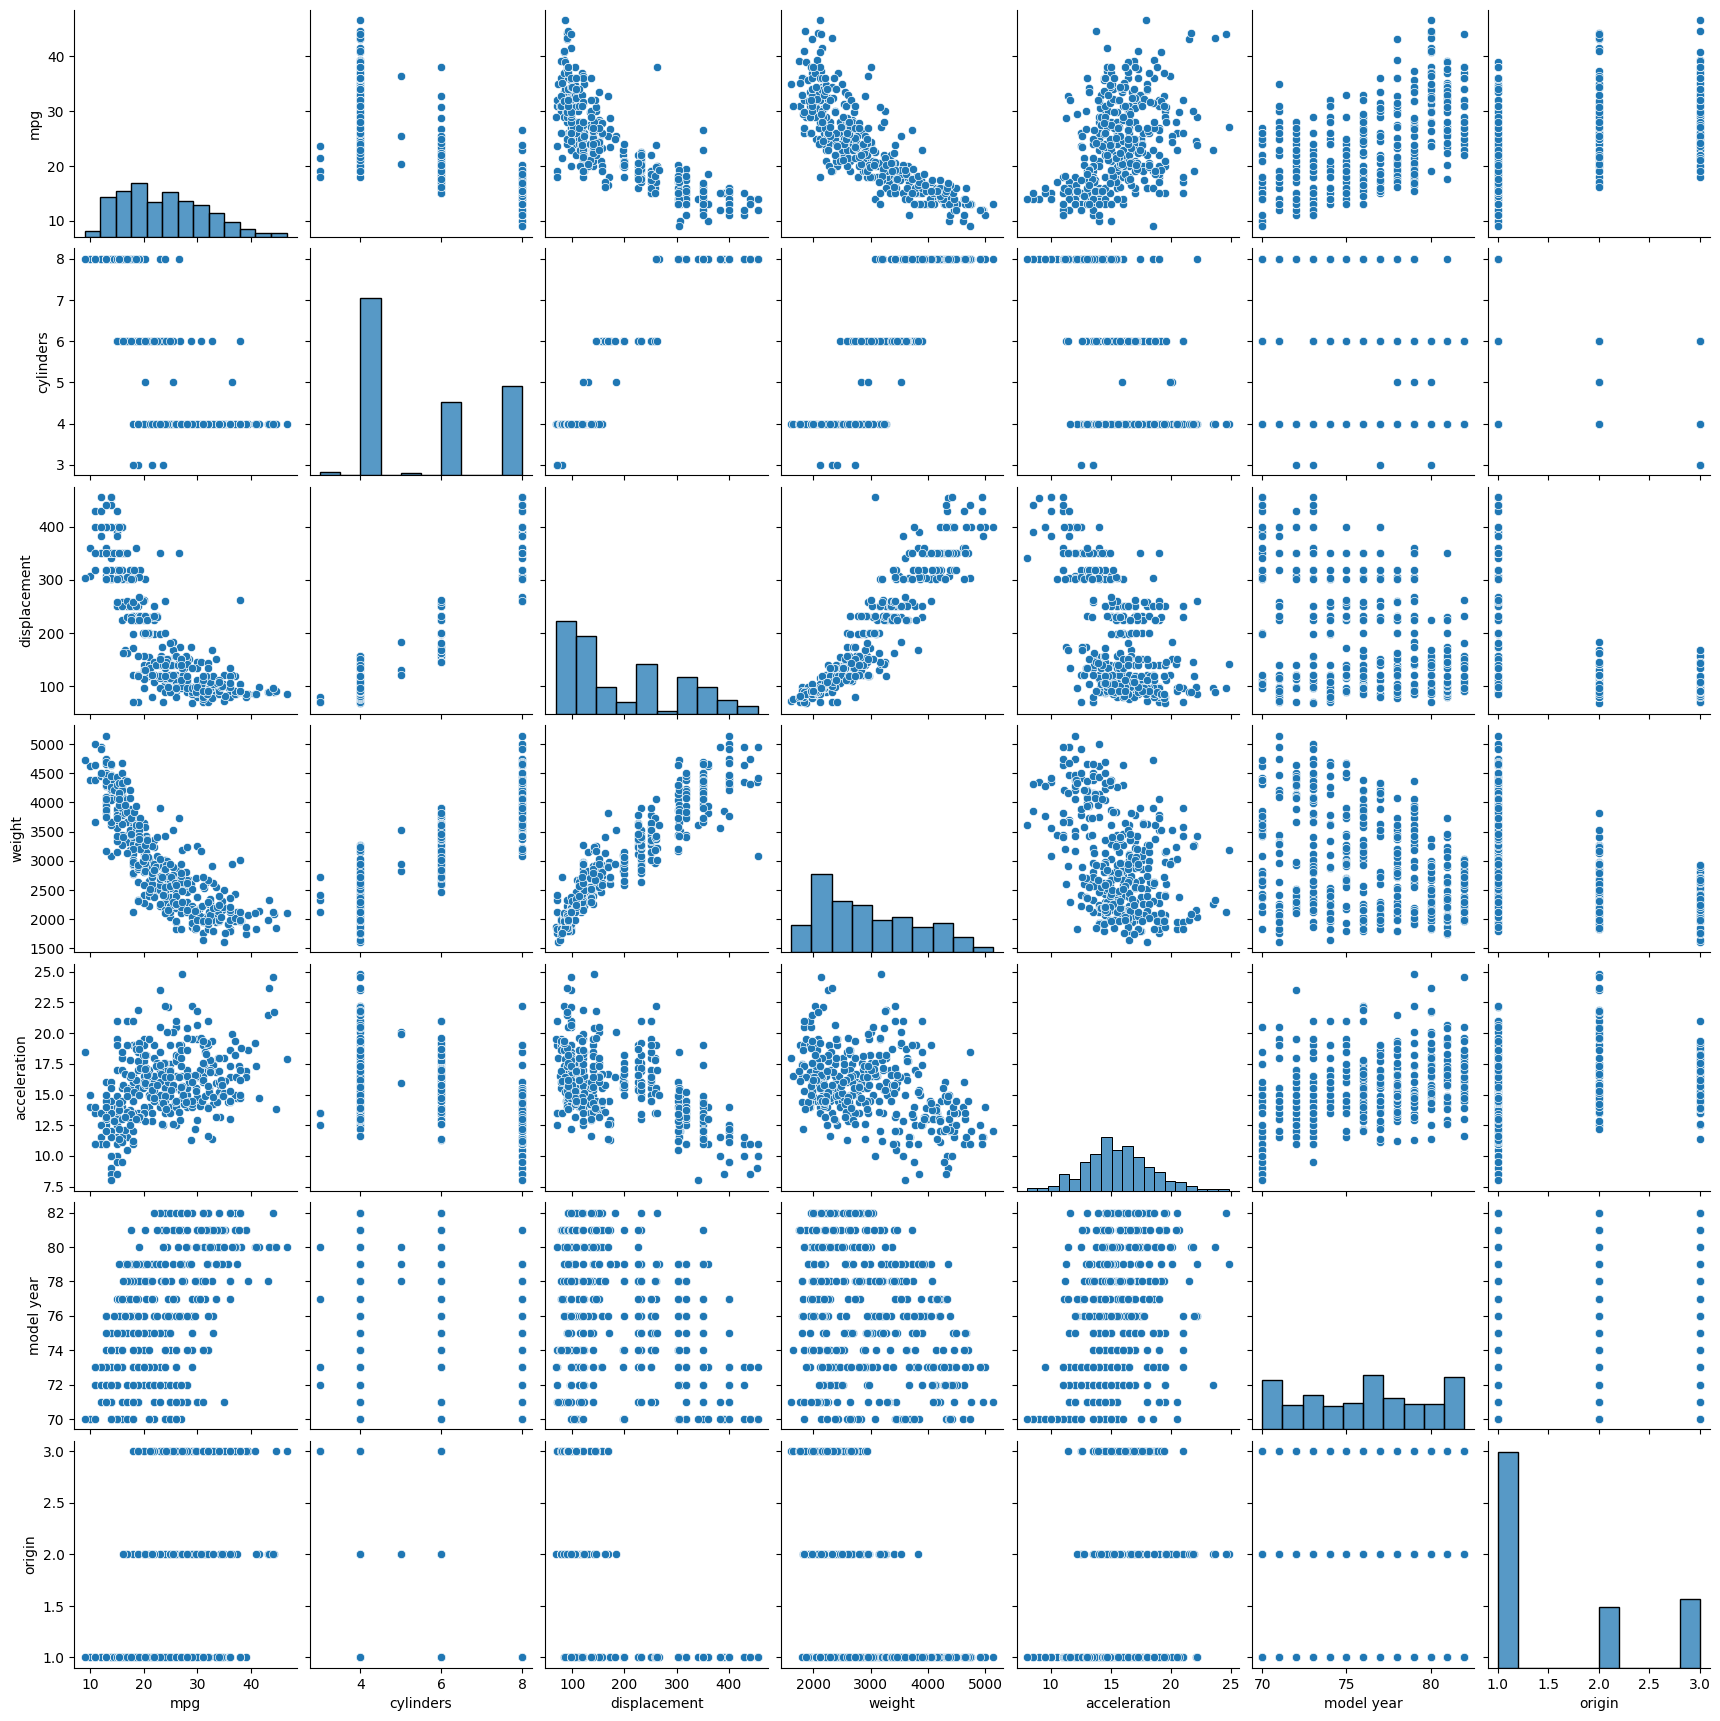

In [12]:


# Pairplot
sb.pairplot(df)
plt.show()


In [13]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

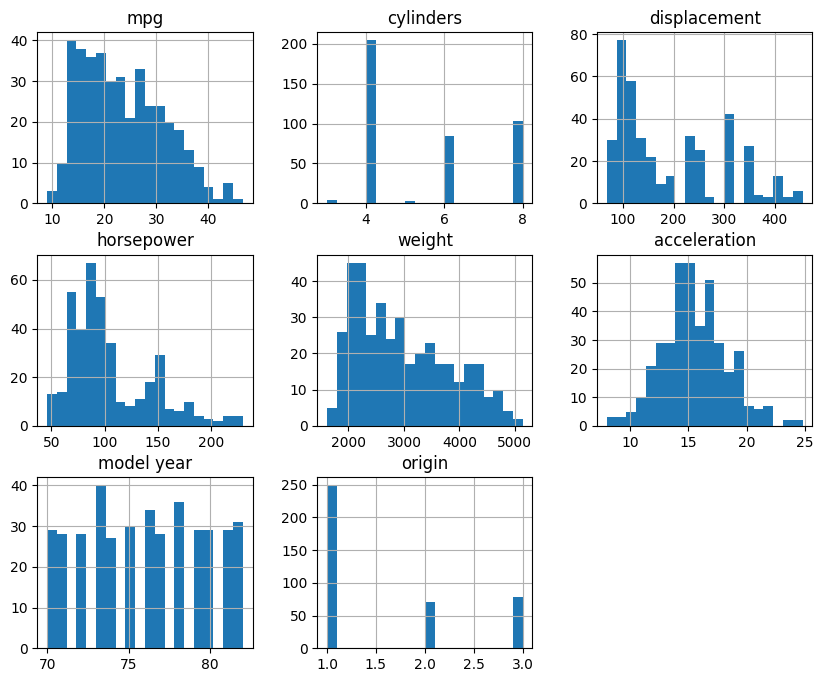

In [14]:
df.hist(figsize=(10, 8), bins=20)

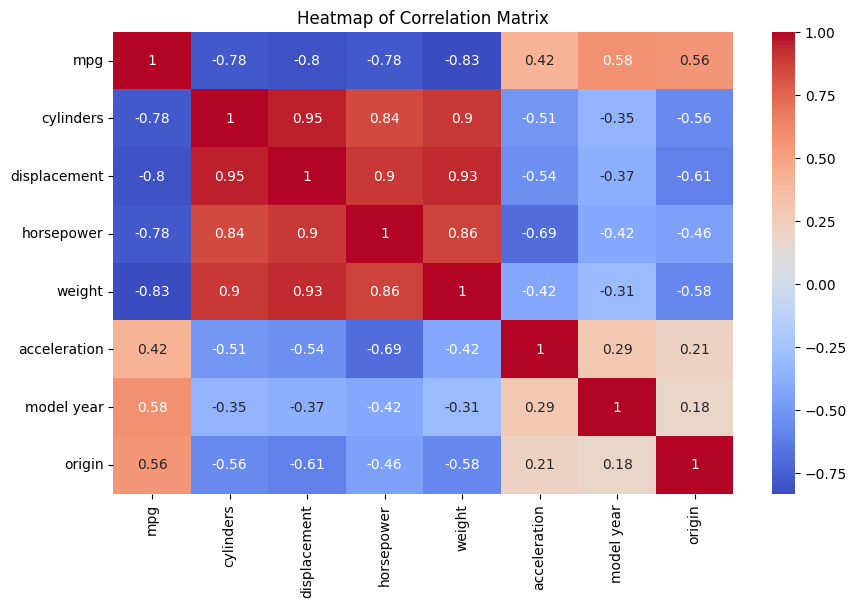

In [15]:
numeric_df = pd.get_dummies(df.drop(columns=['car name']))
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Drop rows with missing values
df.dropna(inplace=True)



# Define features and target
selected_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df[selected_features]
y = df['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [17]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


lr_model = LinearRegression()


lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R-squared:", r2_lr)


Linear Regression - Mean Squared Error: 10.17516253063608
Linear Regression - R-squared: 0.8076704419810161


In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)


dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R-squared:", r2_dt)


Decision Tree - Mean Squared Error: 12.854576271186442
Decision Tree - R-squared: 0.7570245226732457


In [19]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)


Random Forest - Mean Squared Error: 6.836110533898287
Random Forest - R-squared: 0.870784755172713


In [20]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)


Gradient Boosting - Mean Squared Error: 8.151340807257922
Gradient Boosting - R-squared: 0.8459244488722659


Linear Regression - Mean Squared Error: 10.17516253063608, R-squared: 0.8076704419810161
Decision Tree - Mean Squared Error: 12.854576271186442, R-squared: 0.7570245226732457
Random Forest - Mean Squared Error: 6.836110533898287, R-squared: 0.870784755172713
Gradient Boosting - Mean Squared Error: 8.151340807257922, R-squared: 0.8459244488722659


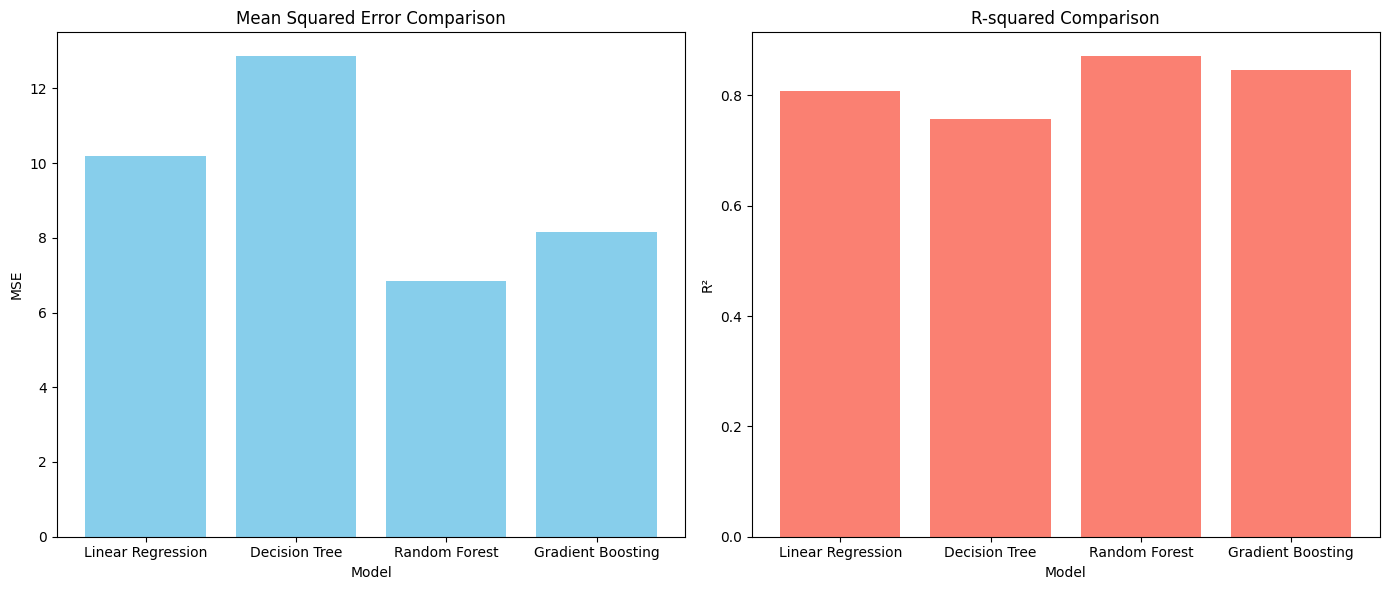

In [21]:

results = {
    'Linear Regression': {'MSE': mse_lr, 'R²': r2_lr},
    'Decision Tree': {'MSE': mse_dt, 'R²': r2_dt},
    'Random Forest': {'MSE': mse_rf, 'R²': r2_rf},
    'Gradient Boosting': {'MSE': mse_gb, 'R²': r2_gb}
}


for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['MSE']}, R-squared: {metrics['R²']}")


import matplotlib.pyplot as plt

mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R²'] for metrics in results.values()]
model_names = list(results.keys())

fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].bar(model_names, mse_values, color='skyblue')
ax[0].set_title('Mean Squared Error Comparison')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MSE')

# Bar plot for R-squared
ax[1].bar(model_names, r2_values, color='salmon')
ax[1].set_title('R-squared Comparison')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R²')

plt.tight_layout()
plt.show()


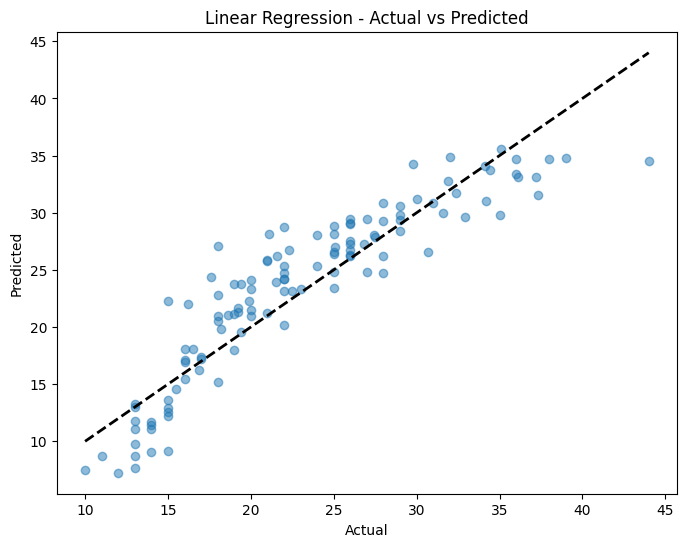

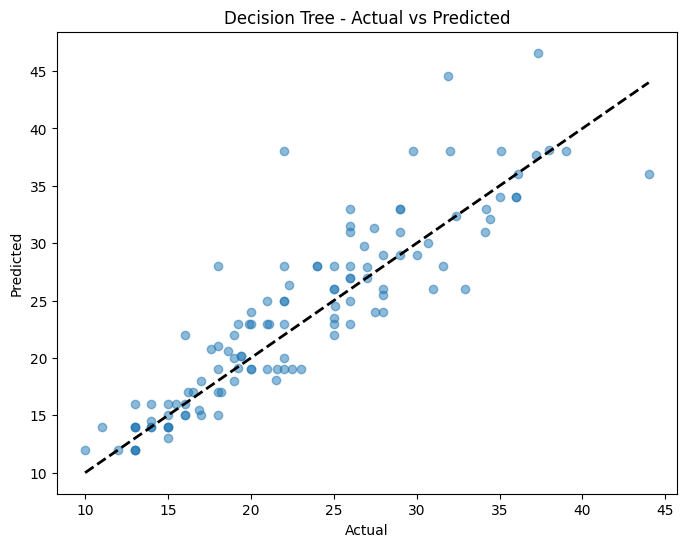

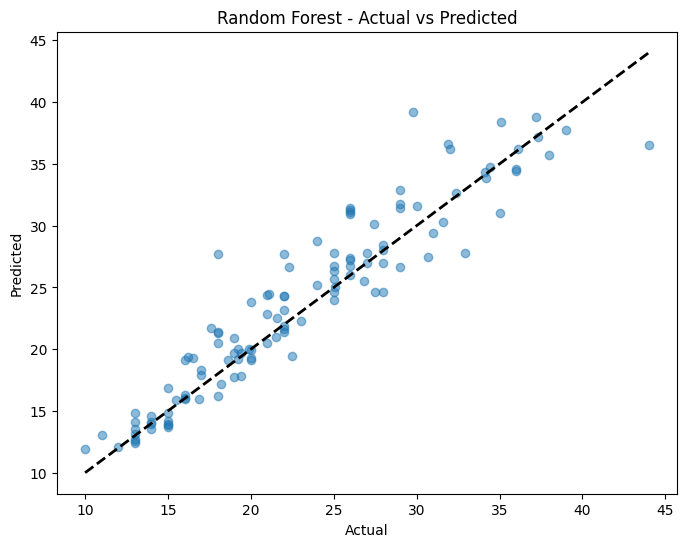

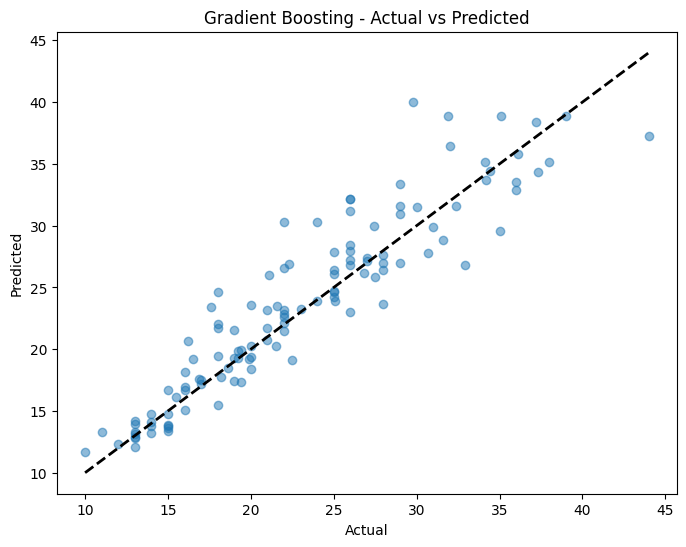

In [22]:
import matplotlib.pyplot as plt


def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Linear Regression
plot_actual_vs_predicted(y_test, y_pred_lr, 'Linear Regression - Actual vs Predicted')

# Decision Tree
plot_actual_vs_predicted(y_test, y_pred_dt, 'Decision Tree - Actual vs Predicted')

# Random Forest
plot_actual_vs_predicted(y_test, y_pred_rf, 'Random Forest - Actual vs Predicted')

# Gradient Boosting
plot_actual_vs_predicted(y_test, y_pred_gb, 'Gradient Boosting - Actual vs Predicted')


In [23]:
# Actual vs Predicted values for Linear Regression
actual_vs_predicted_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print("Linear Regression - Actual vs Predicted:")
print(actual_vs_predicted_lr.head())  # Display the first few rows

# Actual vs Predicted values for Decision Tree
actual_vs_predicted_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
print("Decision Tree - Actual vs Predicted:")
print(actual_vs_predicted_dt.head())  # Display the first few rows

# Actual vs Predicted values for Random Forest
actual_vs_predicted_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print("Random Forest - Actual vs Predicted:")
print(actual_vs_predicted_rf.head())  # Display the first few rows

# Actual vs Predicted values for Gradient Boosting
actual_vs_predicted_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})
print("Gradient Boosting - Actual vs Predicted:")
print(actual_vs_predicted_gb.head())  # Display the first few rows


Linear Regression - Actual vs Predicted:
     Actual  Predicted
79     26.0  26.310510
276    21.6  26.246675
248    36.1  33.144880
56     26.0  27.224405
393    27.0  29.465502
Decision Tree - Actual vs Predicted:
     Actual  Predicted
79     26.0       23.0
276    21.6       19.0
248    36.1       36.0
56     26.0       33.0
393    27.0       27.9
Random Forest - Actual vs Predicted:
     Actual  Predicted
79     26.0     26.700
276    21.6     22.497
248    36.1     36.186
56     26.0     31.249
393    27.0     27.793
Gradient Boosting - Actual vs Predicted:
     Actual  Predicted
79     26.0  27.226436
276    21.6  23.524232
248    36.1  35.839807
56     26.0  28.410821
393    27.0  27.348955


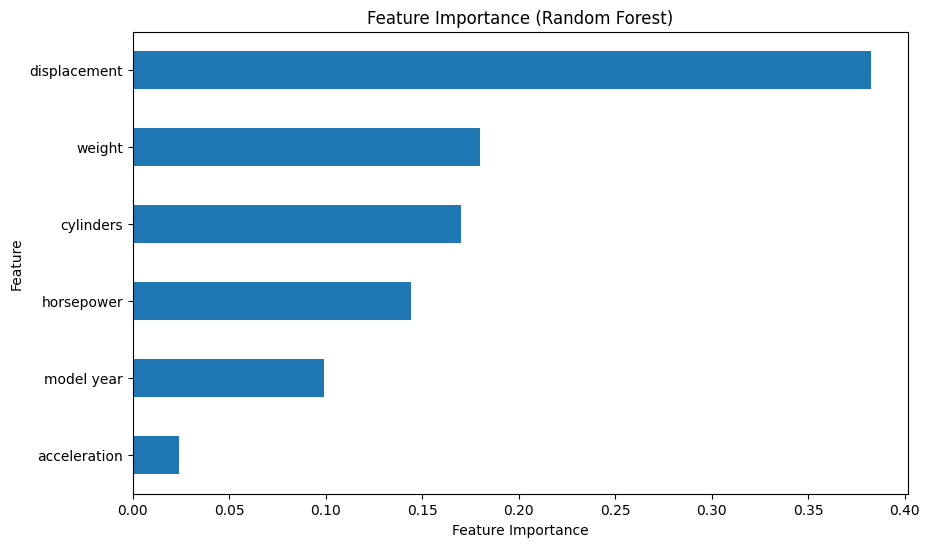

In [24]:

importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values()
importances.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared scores: ", cv_scores)
print("Mean Cross-Validation R-squared score: ", cv_scores.mean())


Cross-Validation R-squared scores:  [0.88487422 0.77858631 0.86550683 0.92511204 0.87442896]
Mean Cross-Validation R-squared score:  0.8657016738748103


In [27]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


              importance
displacement    0.382613
weight          0.179738
cylinders       0.170248
horsepower      0.144199
model year      0.099077
acceleration    0.024124


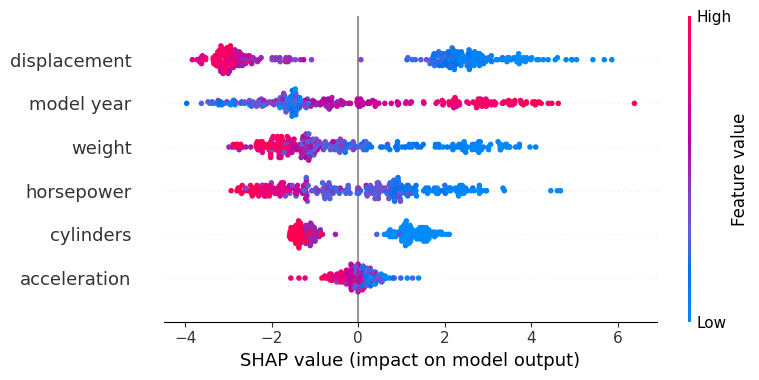

In [28]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Plot the summary plot
shap.summary_plot(shap_values, X_train)


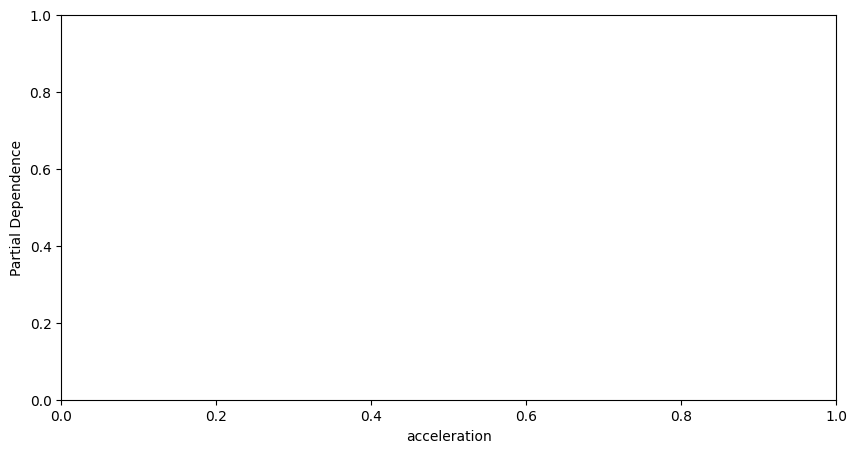

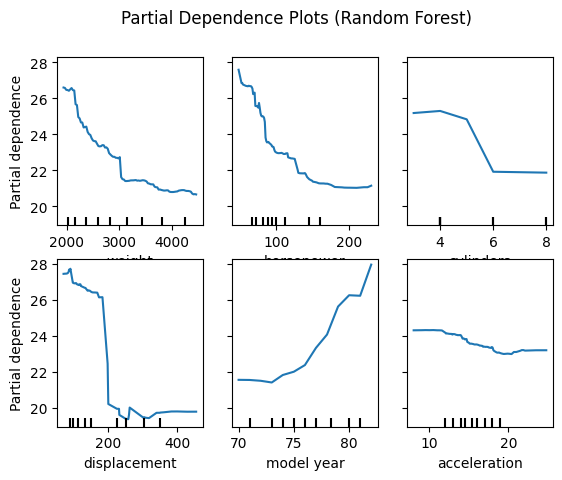

In [34]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = ['weight', 'horsepower', 'cylinders', 'displacement', 'model year', 'acceleration']

# Generate the partial dependence plots
fig, ax = plt.subplots(figsize=(10, 5))
display = PartialDependenceDisplay.from_estimator(rf_model, X_train, features)
plt.suptitle('Partial Dependence Plots (Random Forest)')
for i, feature in enumerate(features):
    # Get the axis for the i-th plot
    
    
    # Set x and y axis labels for each subplot
    ax.set_xlabel(feature)  # Label for the x-axis (feature)
    ax.set_ylabel('Partial Dependence')  # Label for the y-axis (Partial Dependence)
plt.show()


In [29]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('random_forest_model.pkl')


In [31]:
# Evaluate the final model on the test set
y_pred_test = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set Mean Squared Error: {mse_test}")
print(f"Test Set R-squared: {r2_test}")


Test Set Mean Squared Error: 6.836110533898287
Test Set R-squared: 0.870784755172713
